In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


In [61]:
df.describe()

,value
count,1.304000e+03
mean,6.722068e+04
std,5.933964e+04
min,1.201000e+03
25%,3.575775e+04
50%,5.719750e+04
75%,8.388300e+04
max,1.173655e+06


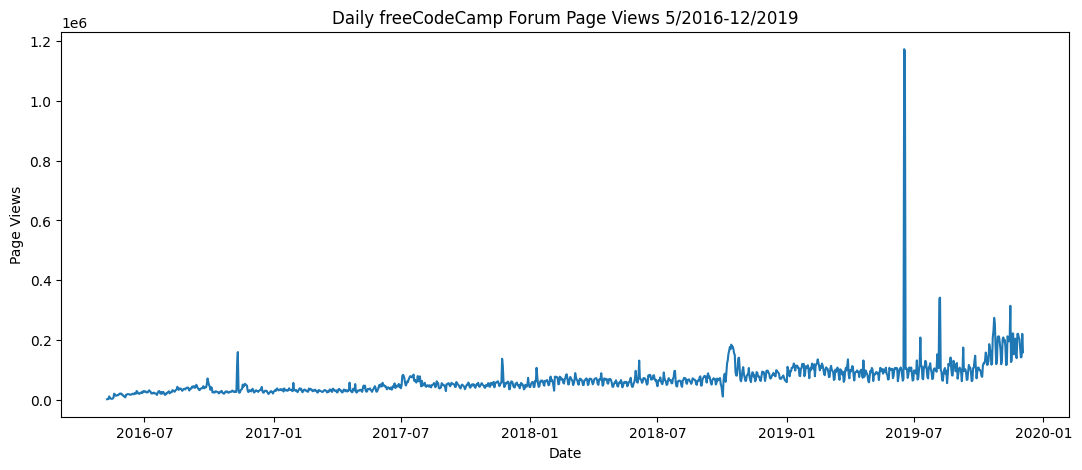

In [62]:

plt.figure(figsize=(13, 5))
plt.plot(df.index, df['value'], label='line')

plt.xlabel('Date')
plt.ylabel('Page Views')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.show()

In [63]:
df['year'] = df.index.year
df['month'] = df.index.month

In [64]:
df.head()

,value,year,month
date,,,
2016-05-09,1201,2016,5
2016-05-10,2329,2016,5
2016-05-11,1716,2016,5
2016-05-12,10539,2016,5
2016-05-13,6933,2016,5


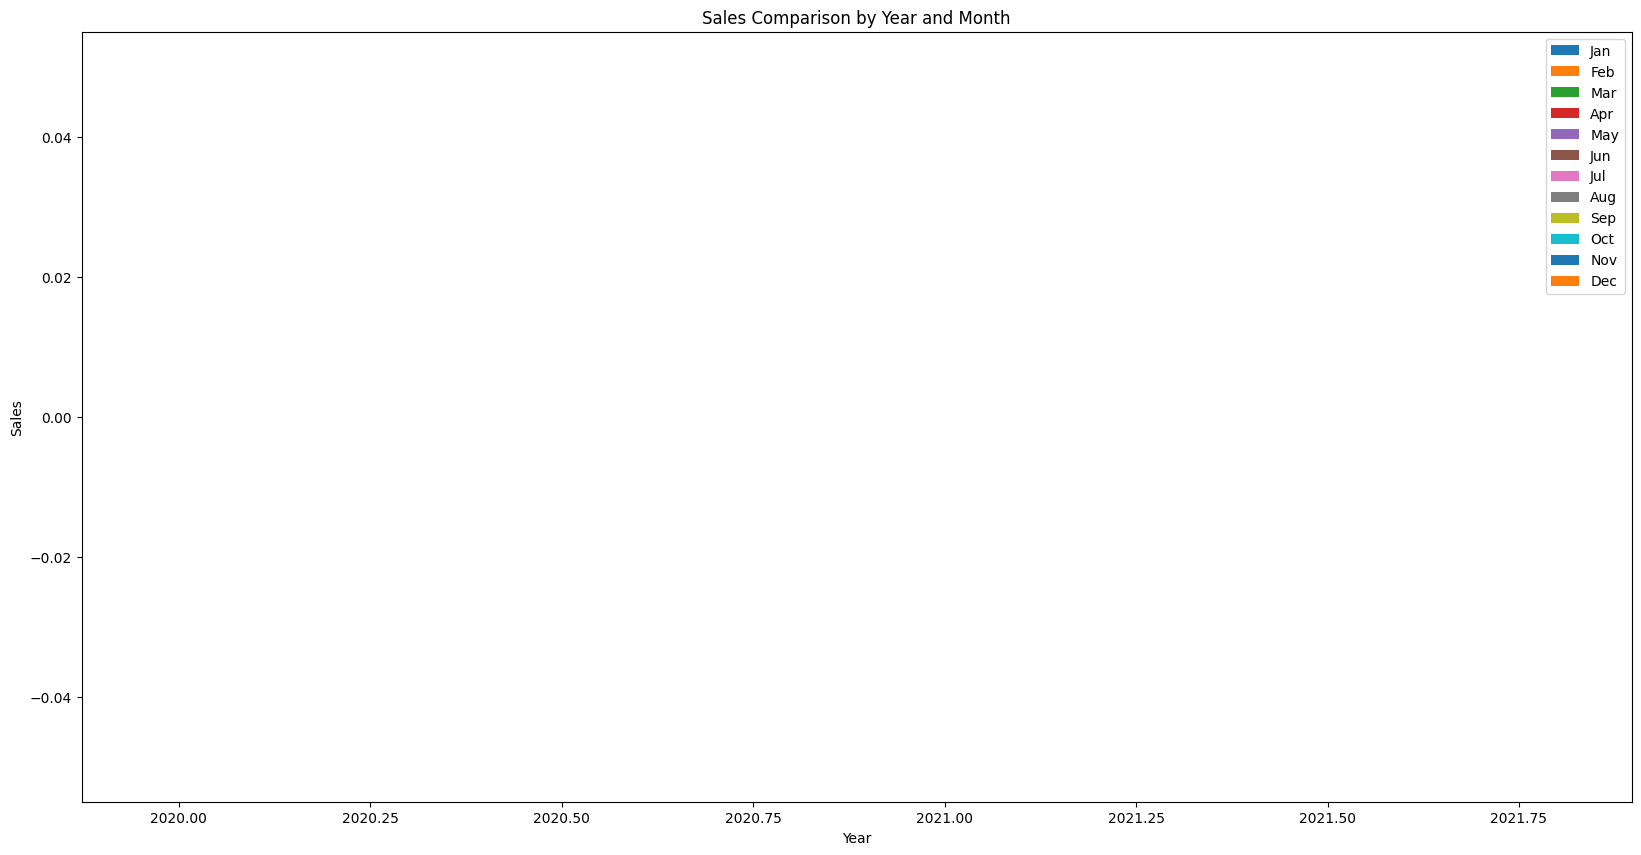

In [65]:
fig, ax = plt.subplots(figsize=(20, 10))
width = 0.07  # Definindo a largura da barra
months = list(range(1, 13))  # Meses de 1 a 12
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Iteração sobre os anos e meses para criar as barras
for idx, el in enumerate(lista_de_anos):
    for i in range(1, 13):  # De 1 a 12 para os meses
        # Filtrando o DataFrame por ano e mês
        monthly_value = df[(df['year'] == el) & (df['month'] == i)]['value'].sum()
        
        # Definindo o deslocamento das barras com base nos meses
        ax.bar(el + (i-1) * width, monthly_value, width, label=month_labels[i-1] if idx == 0 else "")

# Ajustando rótulos
ax.set_xlabel('Year')
ax.set_ylabel('Sales')
ax.set_title('Sales Comparison by Year and Month')

# Colocando legenda (evita duplicação de rótulos de meses)
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

# Exibindo o gráfico
plt.show()

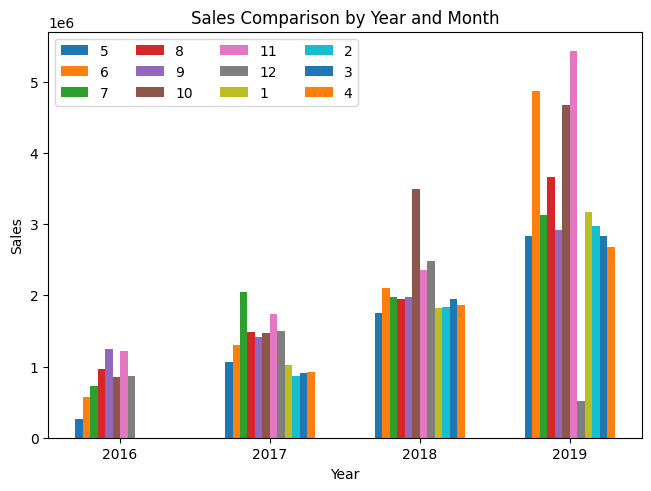

In [88]:
anos = df['year'].unique()
meses = df['month'].unique()
dados = {}

for mes in meses:
    for ano in anos:
        valor = df[(df['month'] == mes) & (df['year'] == ano)]['value'].sum()
        
        
        if mes not in dados:
            dados[mes] = [valor]  
        else:
            dados[mes].append(valor) 

x = np.arange(len(anos))  
width = 0.05  
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in dados.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

ax.set_xticks(x + width * (len(meses) - 1) / 2)  
ax.set_xticklabels(anos)

ax.set_xlabel('Year')
ax.set_ylabel('Sales')
ax.set_title('Sales Comparison by Year and Month')
ax.legend(loc='upper left', ncols=4)


plt.show()

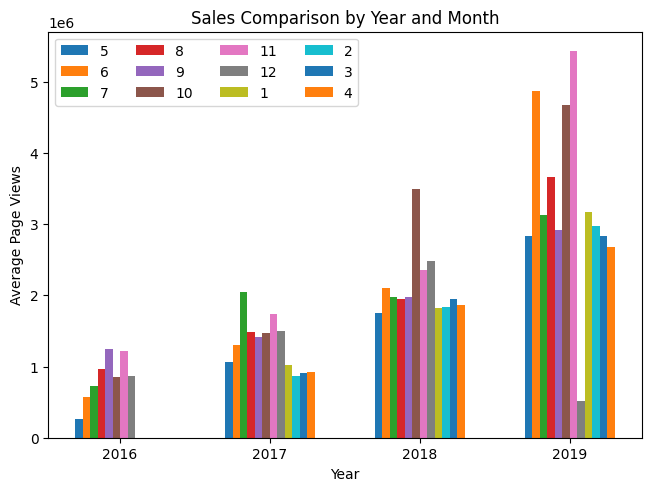

In [89]:
    # Copy and modify data for monthly bar plot
    df['year'] = df.index.year
    df['month'] = df.index.month

    # Draw bar plot
    anos = df['year'].unique()
    meses = df['month'].unique()
    dados = {}

    for mes in meses:
        for ano in anos:
            valor = df[(df['month'] == mes) & (df['year'] == ano)]['value'].sum()
            
            
            if mes not in dados:
                dados[mes] = [valor]  
            else:
                dados[mes].append(valor) 

    x = np.arange(len(anos))  
    width = 0.05  
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')

    for attribute, measurement in dados.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        multiplier += 1

    ax.set_xticks(x + width * (len(meses) - 1) / 2)  
    ax.set_xticklabels(anos)

    ax.set_xlabel('Year')
    ax.set_ylabel('Average Page Views')
    ax.set_title('Sales Comparison by Year and Month')
    ax.legend(loc='upper left', ncols=4)

    plt.show()